In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("weather_classification_data.csv")
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [6]:
# Remove duplicates
df = df.drop_duplicates()

# Fill missing values
for col in df.select_dtypes(include="number"):
    df[col] = df[col].fillna(df[col].mean())
    
for col in df.select_dtypes(include="object"):
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()


Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

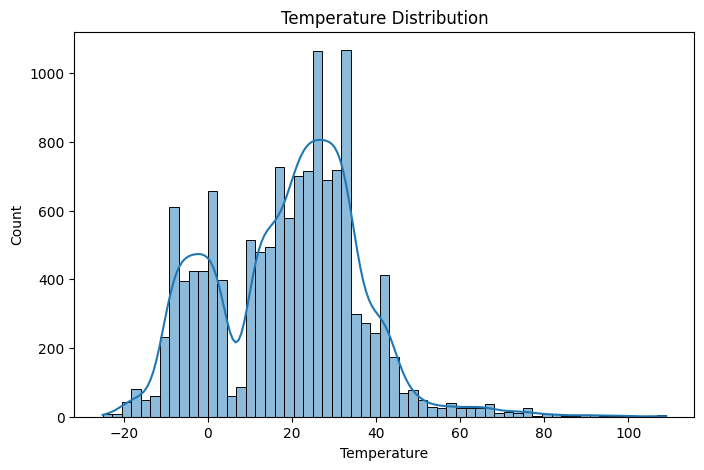

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["Temperature"], kde=True)
plt.title("Temperature Distribution")
plt.show()


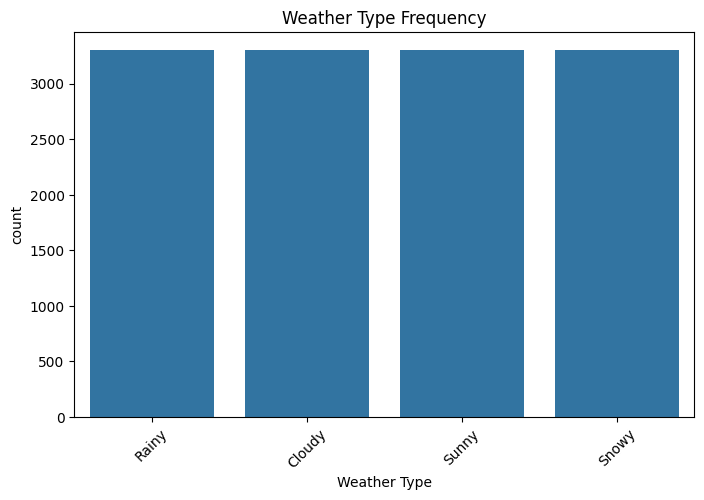

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Weather Type"])
plt.xticks(rotation=45)
plt.title("Weather Type Frequency")
plt.show()


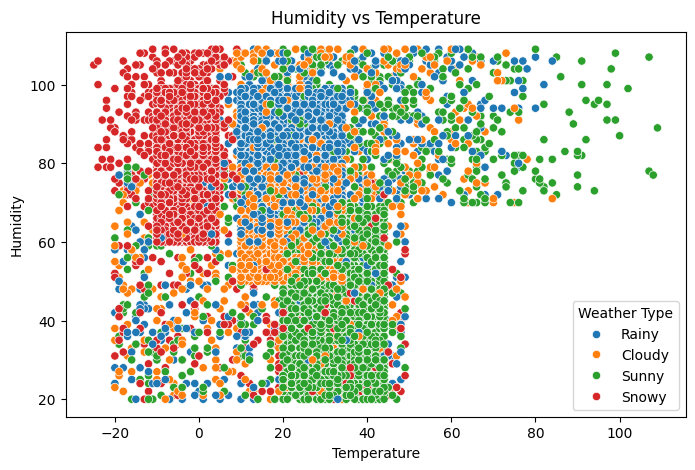

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Temperature", y="Humidity", hue="Weather Type")
plt.title("Humidity vs Temperature")
plt.show()


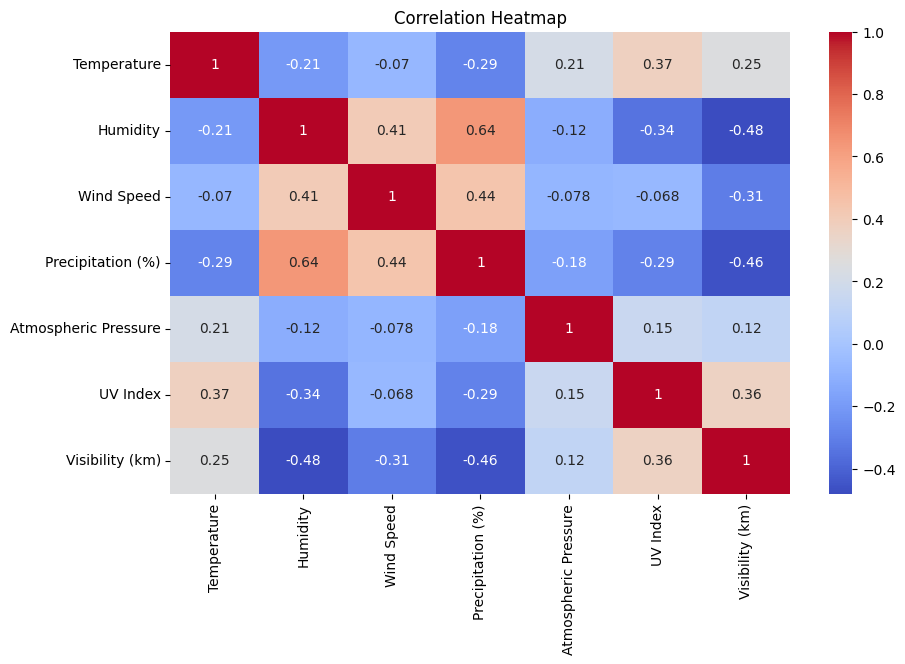

In [12]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [13]:
df["Date"] = pd.date_range(start="2024-01-01", periods=len(df), freq="D")
df["Month"] = df["Date"].dt.month



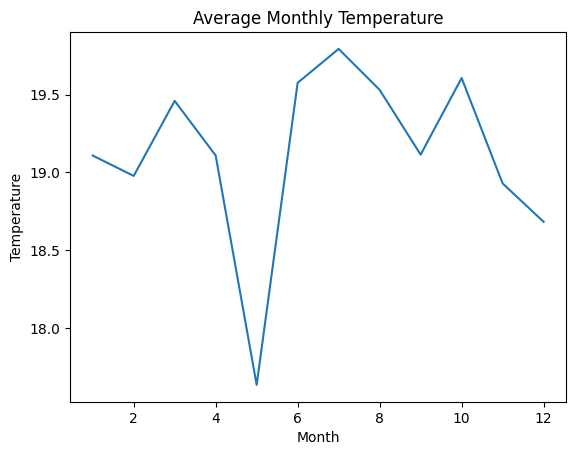

In [14]:
monthly_avg = df.groupby("Month")["Temperature"].mean()

plt.plot(monthly_avg)
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()
